In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
init_notebook_mode(True)

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

## Day 1: Gradient Plots

In [4]:
directory = hpc_ext_path+'datafiles/magnet_maps/'
filename = '2019-04-27 160216.txt'

In [5]:
#df = pd.read_csv(directory+filename)
#%timeit df = pd.read_csv(directory+filename)

In [5]:
df = pd.read_csv(directory+filename)

In [6]:
df.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_MicroStep_X,Zaber_Meas_Encoder_X,Zaber_Meas_MicroStep_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_MicroStep_Z,Zaber_Meas_Encoder_Z
count,26040.000000,26040.000000,26040.000000,26040.0,26040.00000,26040.000000,2.604000e+04,26040.00000,26040.000000,26040.000000,26040.000000,2.604000e+04,26040.000000
mean,8.943570,39.935934,0.088399,0.0,535000.00000,452000.000000,1.600000e+06,535000.00000,208984.375000,452000.000000,176562.500000,1.600000e+06,625000.000000
std,0.000146,0.229242,0.333659,0.0,40312.06279,173184.348209,8.944444e+04,40312.06279,15746.899527,173184.348209,67650.136019,8.944444e+04,34939.233031
min,8.942812,39.590450,0.000000,0.0,470000.00000,157000.000000,1.450000e+06,470000.00000,183593.750000,157000.000000,61328.125000,1.450000e+06,566406.250000
25%,8.943455,39.808520,0.000000,0.0,500000.00000,304500.000000,1.520000e+06,500000.00000,195312.500000,304500.000000,118945.312500,1.520000e+06,593750.000000
50%,8.943559,39.851315,0.000000,0.0,535000.00000,452000.000000,1.600000e+06,535000.00000,208984.375000,452000.000000,176562.500000,1.600000e+06,625000.000000
75%,8.943710,39.970728,0.000000,0.0,570000.00000,599500.000000,1.680000e+06,570000.00000,222656.250000,599500.000000,234179.687500,1.680000e+06,656250.000000
max,8.943839,40.610420,1.349145,0.0,600000.00000,747000.000000,1.750000e+06,600000.00000,234375.000000,747000.000000,291796.875000,1.750000e+06,683593.750000


In [7]:
drops = [col for col in list(df.columns) if ("MicroStep" in col) or ("FFT" in col)]

In [8]:
list(df.columns)

['Time',
 ' Magnet Current [V]',
 ' Magnet Voltage [V]',
 'NMR [T]',
 ' NMR [FFT]',
 ' Zaber_Pattern_X',
 ' Zaber_Pattern_Y',
 ' Zaber_Pattern_Z',
 ' Zaber_Meas_MicroStep_X',
 ' Zaber_Meas_Encoder_X',
 ' Zaber_Meas_MicroStep_Y',
 ' Zaber_Meas_Encoder_Y',
 ' Zaber_Meas_MicroStep_Z',
 ' Zaber_Meas_Encoder_Z']

In [9]:
drops

[' NMR [FFT]',
 ' Zaber_Meas_MicroStep_X',
 ' Zaber_Meas_MicroStep_Y',
 ' Zaber_Meas_MicroStep_Z']

In [10]:
df.drop(drops,axis=1,inplace=True)

In [11]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z
0,4/27/2019 4:03:51 PM,8.943308,40.11552,0.0,470000.0,157000.0,1450000.0,183593.75,61328.125,566406.25
1,4/27/2019 4:04:20 PM,8.943311,40.11513,0.0,470000.0,157000.0,1460000.0,183593.75,61328.125,570312.50
2,4/27/2019 4:04:50 PM,8.943311,40.11472,0.0,470000.0,157000.0,1470000.0,183593.75,61328.125,574218.75
3,4/27/2019 4:05:19 PM,8.943310,40.11436,0.0,470000.0,157000.0,1480000.0,183593.75,61328.125,578125.00
4,4/27/2019 4:05:48 PM,8.943307,40.11389,0.0,470000.0,157000.0,1490000.0,183593.75,61328.125,582031.25
5,4/27/2019 4:06:17 PM,8.943327,40.11345,0.0,470000.0,157000.0,1500000.0,183593.75,61328.125,585937.50
6,4/27/2019 4:06:46 PM,8.943320,40.11309,0.0,470000.0,157000.0,1510000.0,183593.75,61328.125,589843.75
7,4/27/2019 4:07:16 PM,8.943319,40.11253,0.0,470000.0,157000.0,1520000.0,183593.75,61328.125,593750.00
8,4/27/2019 4:07:45 PM,8.943319,40.11204,0.0,470000.0,157000.0,1530000.0,183593.75,61328.125,597656.25
9,4/27/2019 4:08:14 PM,8.943318,40.11159,0.0,470000.0,157000.0,1540000.0,183593.75,61328.125,601562.50


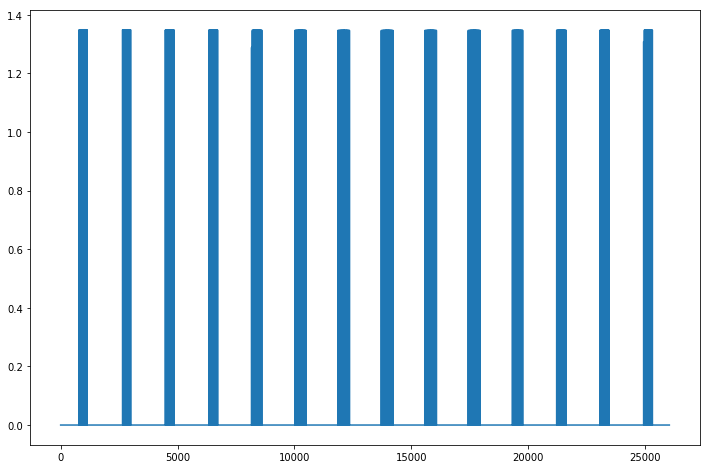

In [12]:
df['NMR [T]'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8012e2df98>,
      dtype=object)

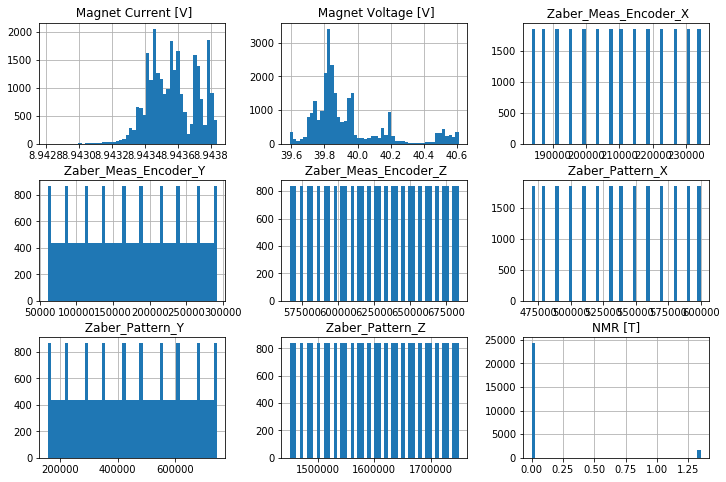

In [12]:
df.hist(bins=50)

In [15]:
df.columns

Index(['Time', ' Magnet Current [V]', ' Magnet Voltage [V]', 'NMR [T]',
       ' Zaber_Pattern_X', ' Zaber_Pattern_Y', ' Zaber_Pattern_Z',
       ' Zaber_Meas_Encoder_X', ' Zaber_Meas_Encoder_Y',
       ' Zaber_Meas_Encoder_Z'],
      dtype='object')

In [13]:
fig = scatter2d(df[" Zaber_Pattern_X"], df[" Zaber_Meas_Encoder_X"], inline=True)

In [18]:
df[np.isclose(df[" Zaber_Meas_Encoder_X"],639878., rtol=1, atol=1000)]

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z
0,4/27/2019 4:03:51 PM,8.943308,40.11552,0.0,470000.0,157000.0,1450000.0,183593.75,61328.125,566406.25
1,4/27/2019 4:04:20 PM,8.943311,40.11513,0.0,470000.0,157000.0,1460000.0,183593.75,61328.125,570312.50
2,4/27/2019 4:04:50 PM,8.943311,40.11472,0.0,470000.0,157000.0,1470000.0,183593.75,61328.125,574218.75
3,4/27/2019 4:05:19 PM,8.943310,40.11436,0.0,470000.0,157000.0,1480000.0,183593.75,61328.125,578125.00
4,4/27/2019 4:05:48 PM,8.943307,40.11389,0.0,470000.0,157000.0,1490000.0,183593.75,61328.125,582031.25
5,4/27/2019 4:06:17 PM,8.943327,40.11345,0.0,470000.0,157000.0,1500000.0,183593.75,61328.125,585937.50
6,4/27/2019 4:06:46 PM,8.943320,40.11309,0.0,470000.0,157000.0,1510000.0,183593.75,61328.125,589843.75
7,4/27/2019 4:07:16 PM,8.943319,40.11253,0.0,470000.0,157000.0,1520000.0,183593.75,61328.125,593750.00
8,4/27/2019 4:07:45 PM,8.943319,40.11204,0.0,470000.0,157000.0,1530000.0,183593.75,61328.125,597656.25
9,4/27/2019 4:08:14 PM,8.943318,40.11159,0.0,470000.0,157000.0,1540000.0,183593.75,61328.125,601562.50


In [13]:
notzero = df['NMR [T]'] != 0

In [14]:
df_nz = df[notzero]

In [15]:
len(df_nz)

1708

In [16]:
len(df)

26040

In [17]:
1708/26040

0.06559139784946237

In [18]:
df_nz.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1.708000e+03,1708.000000,1708.000000,1708.000000
mean,8.943597,39.919984,1.347727,534888.758782,458861.826698,1.599157e+06,208940.921399,179242.901054,624670.667447
std,0.000136,0.193804,0.002414,37970.472789,36055.345330,2.782473e+04,14832.215933,14084.119269,10869.034827
min,8.943390,39.673740,1.288707,470000.000000,377000.000000,1.540000e+06,183593.750000,147265.625000,601562.500000
25%,8.943458,39.811013,1.347525,500000.000000,427000.000000,1.580000e+06,195312.500000,166796.875000,617187.500000
50%,8.943573,39.861475,1.347817,540000.000000,457000.000000,1.600000e+06,210937.500000,178515.625000,625000.000000
75%,8.943718,39.968245,1.348234,570000.000000,487000.000000,1.620000e+06,222656.250000,190234.375000,632812.500000
max,8.943833,40.551460,1.349145,600000.000000,537000.000000,1.660000e+06,234375.000000,209765.625000,648437.500000


In [26]:
histo(df_nz["NMR [T]"],yscale='log',bins=50,cut=[0.017,1],inline=True);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0310a70b8>,
      dtype=object)

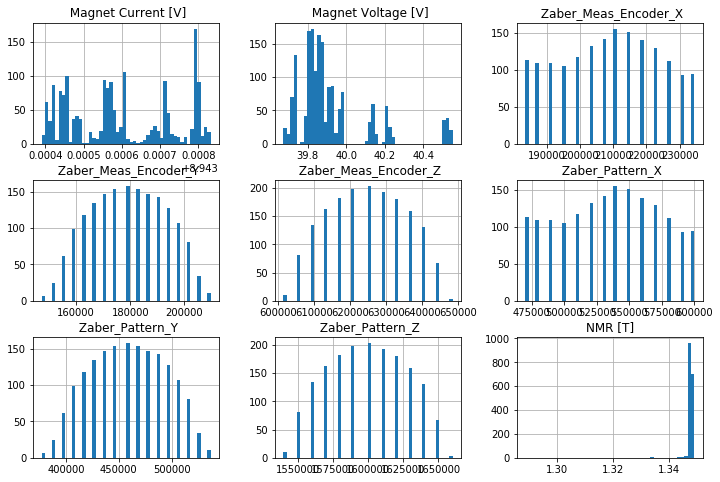

In [22]:
df_nz.hist(bins=50)

In [24]:
scatter3d(df_nz[' Zaber_Pattern_X'],df_nz[' Zaber_Pattern_Y'],df_nz[' Zaber_Pattern_Z'],scale_list=[df_nz['NMR [T]']]);

In [25]:
scatter3d(df[' Zaber_Pattern_X'],df[' Zaber_Pattern_Y'],df[' Zaber_Pattern_Z'],scale_list=[df['NMR [T]']]);

In [26]:
x =  (df[' Zaber_Pattern_X'] >= 470000) & (df[' Zaber_Pattern_X'] <= 600000)
y =  (df[' Zaber_Pattern_Y'] >= 377000) & (df[' Zaber_Pattern_Y'] <= 537000)
z =  (df[' Zaber_Pattern_Z'] >= 1540000) & (df[' Zaber_Pattern_Z'] <= 1660000)
cube = x & y & z
df_c = df[cube]
df_c.reset_index(drop=True,inplace=True)

In [27]:
scatter3d(df_c[' Zaber_Pattern_X'],df_c[' Zaber_Pattern_Y'],df_c[' Zaber_Pattern_Z'],scale_list=[df_c['NMR [T]']]);

In [28]:
x = df_c[' Zaber_Pattern_X'].unique()
y = df_c[' Zaber_Pattern_Y'].unique()
z = df_c[' Zaber_Pattern_Z'].unique()

In [29]:
ff = np.array(df_c['NMR [T]'])
ff = np.reshape(ff,(len(x),len(y),len(z)))

In [30]:
gradx, grady, gradz = np.gradient(ff,x,y,z)

In [31]:
gradmag = (gradx**2+grady**2+gradz**2)**(1/2)

In [32]:
gradx = pd.Series(gradx.flatten())
grady = pd.Series(grady.flatten())
gradz = pd.Series(gradz.flatten())

In [33]:
gradmag = pd.Series(gradmag.flatten())

In [34]:
df_c['GRAD_B_X'],df_c['GRAD_B_Y'],df_c['GRAD_B_Z'],df_c['GRAD_B_MAG'] = (gradx,grady,gradz,gradmag)

In [35]:
notzero = df_c['NMR [T]'] != 0

In [36]:
df_g = df_c[notzero]

In [37]:
#g_cut = df_g["GRAD_B_MAG"] <= df_g["GRAD_B_MAG"].quantile(0.15)
g_cut = df_g["GRAD_B_MAG"] <= df_g["GRAD_B_MAG"].quantile(0.1)

In [39]:
fig = scatter3d([df_g[g_cut][' Zaber_Pattern_X'],df_g[' Zaber_Pattern_X']],[df_g[g_cut][' Zaber_Pattern_Y'],df_g[' Zaber_Pattern_Y']],[df_g[g_cut][' Zaber_Pattern_Z'],df_g[' Zaber_Pattern_Z']],scale_list=[df_g[g_cut]['GRAD_B_MAG'],df_g["GRAD_B_MAG"]],opacity_list=[1.,0.25],colors_list=['Hot','Viridis'],inline=False);

In [40]:
#fig.layout.xaxis.title='Zaber_Pattern_Z (microns)'
fig.layout.scene.xaxis = dict(title=r"Zaber_Pattern_X")
fig.layout.scene.yaxis = dict(title=r"Zaber_Pattern_Y")
fig.layout.scene.zaxis = dict(title=r"Zaber_Pattern_Z")
fig.layout.title = "|grad(B)| vs. x,y,z: Gradient Cut"

In [41]:
#plot(fig,filename="/home/ckampa/Dropbox/research/deliverables/plots/gradient_cut.html")
plot(fig,filename="/home/ckampa/Dropbox/research/deliverables/plots/gradient_cut.html")

'file:///home/ckampa/Dropbox/research/deliverables/plots/gradient_cut.html'

In [43]:
x_cut = (df_g[' Zaber_Meas_Encoder_X'] > 205000) & (df_g[' Zaber_Meas_Encoder_X'] < 225000)
#x_cut = (df_g[' Zaber_Meas_Encoder_X'] > 200000) & (df_g[' Zaber_Meas_Encoder_X'] < 230000)
y_cut = (df_g[' Zaber_Meas_Encoder_Y'] > 170000) & (df_g[' Zaber_Meas_Encoder_Y'] < 191000)
z_cut = (df_g[' Zaber_Meas_Encoder_Z'] > 615000) & (df_g[' Zaber_Meas_Encoder_Z'] < 633000)
#g_cut2 = g_cut & x_cut
g_cut2 = g_cut & x_cut & y_cut & z_cut

In [44]:
scatter3d([df_g[g_cut2][' Zaber_Meas_Encoder_X']],[df_g[g_cut2][' Zaber_Meas_Encoder_Y']],[df_g[g_cut2][' Zaber_Meas_Encoder_Z']],scale_list=[df_g[g_cut2]['GRAD_B_MAG']],opacity_list=[1.],colors_list=['Viridis'],inline=False);

In [46]:
fig = scatter3d([df_g[g_cut2][' Zaber_Pattern_X']],[df_g[g_cut2][' Zaber_Pattern_Y']],[df_g[g_cut2][' Zaber_Pattern_Z']],scale_list=[df_g[g_cut2]['GRAD_B_MAG']],opacity_list=[1.],colors_list=['Viridis'],inline=False);

In [47]:
#fig.layout.xaxis.title='Zaber_Pattern_Z (microns)'
fig.layout.scene.xaxis = dict(title=r"Zaber_Pattern_X")
fig.layout.scene.yaxis = dict(title=r"Zaber_Pattern_Y")
fig.layout.scene.zaxis = dict(title=r"Zaber_Pattern_Z")
fig.layout.title = "|grad(B)| vs. x,y,z: Gradient Cut + Position Cut"

In [48]:
plot(fig,filename="/home/ckampa/Dropbox/research/deliverables/plots/gradient_position_cuts.html")
#iplot(fig,filename="/home/ckampa/Dropbox/research/deliverables/plots/gradient_position_cuts.html")

'file:///home/ckampa/Dropbox/research/deliverables/plots/gradient_position_cuts.html'

In [49]:
scatter3d([df_g[g_cut][' Zaber_Pattern_X'],df_c[' Zaber_Pattern_X']],[df_g[g_cut][' Zaber_Pattern_Y'],df_c[' Zaber_Pattern_Y']],[df_g[g_cut][' Zaber_Pattern_Z'],df_c[' Zaber_Pattern_Z']],scale_list=[df_g[g_cut]['GRAD_B_MAG'],df_c["NMR [T]"]],opacity_list=[1.,0.1],colors_list=['Hot','Viridis'],inline=False);

In [50]:
df_g[g_cut].describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,171.000000,171.000000,171.000000,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02
mean,8.943603,39.889535,1.347914,541286.549708,459631.578947,1.594561e+06,211440.058480,179543.585526,622875.548246,1.715428e-09,1.016965e-10,1.730032e-10,8.767450e-09
std,0.000138,0.093604,0.000415,28482.911189,17169.704762,1.928762e+04,11126.137183,6706.915923,7534.227561,6.182952e-09,5.009032e-09,4.176522e-09,2.538266e-09
min,8.943420,39.816670,1.347500,470000.000000,417000.000000,1.550000e+06,183593.750000,162890.625000,605468.750000,-1.118080e-08,-1.142290e-08,-8.936300e-09,6.023834e-10
25%,8.943500,39.849995,1.347703,540000.000000,447000.000000,1.580000e+06,210937.500000,174609.375000,617187.500000,-1.217875e-09,-3.026500e-09,-2.291250e-09,7.195568e-09
50%,8.943572,39.872790,1.347779,550000.000000,457000.000000,1.600000e+06,214843.750000,178515.625000,625000.000000,4.128900e-09,4.922000e-10,-3.163500e-10,9.398417e-09
75%,8.943793,39.887615,1.347876,560000.000000,467000.000000,1.610000e+06,218750.000000,182421.875000,628906.250000,6.703625e-09,4.110550e-09,2.039650e-09,1.073760e-08
max,8.943802,40.521860,1.349060,600000.000000,507000.000000,1.630000e+06,234375.000000,198046.875000,636718.750000,1.186610e-08,1.030295e-08,1.135935e-08,1.209389e-08


In [51]:
df_g.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1.708000e+03,1708.000000,1708.000000,1708.000000,1.708000e+03,1.708000e+03,1.708000e+03,1.708000e+03
mean,8.943597,39.919984,1.347727,534888.758782,458861.826698,1.599157e+06,208940.921399,179242.901054,624670.667447,-7.578098e-07,1.617658e-07,-2.718409e-07,2.377803e-05
std,0.000136,0.193804,0.002414,37970.472789,36055.345330,2.782473e+04,14832.215933,14084.119269,10869.034827,2.054678e-05,2.777652e-05,3.183753e-05,4.052508e-05
min,8.943390,39.673740,1.288707,470000.000000,377000.000000,1.540000e+06,183593.750000,147265.625000,601562.500000,-1.349086e-04,-6.745717e-05,-6.745416e-05,6.023834e-10
25%,8.943458,39.811013,1.347525,500000.000000,427000.000000,1.580000e+06,195312.500000,166796.875000,617187.500000,-2.329671e-08,-7.112737e-09,-4.754913e-09,1.630752e-08
50%,8.943573,39.861475,1.347817,540000.000000,457000.000000,1.600000e+06,210937.500000,178515.625000,625000.000000,-3.649075e-09,5.284500e-10,-5.268750e-10,2.383689e-08
75%,8.943718,39.968245,1.348234,570000.000000,487000.000000,1.620000e+06,222656.250000,190234.375000,632812.500000,1.172334e-08,8.092100e-09,4.697037e-09,6.736578e-05
max,8.943833,40.551460,1.349145,600000.000000,537000.000000,1.660000e+06,234375.000000,209765.625000,648437.500000,1.348250e-04,6.745433e-05,6.745725e-05,1.652294e-04


In [52]:
df_g[g_cut2].describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,114.000000,114.000000,114.000000,114.000000,114.000000,1.140000e+02,114.000000,114.000000,114.000000,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02
mean,8.943615,39.885975,1.347793,549736.842105,459456.140351,1.600439e+06,214740.953947,179475.054825,625171.326754,2.606300e-09,5.322807e-12,-4.193513e-10,8.494782e-09
std,0.000148,0.044768,0.000075,12998.333883,14424.745424,1.346187e+04,5077.474173,5634.666181,5258.541751,6.079065e-09,4.992075e-09,3.132354e-09,2.432677e-09
min,8.943420,39.826200,1.347652,530000.000000,437000.000000,1.580000e+06,207031.250000,170703.125000,617187.500000,-1.118080e-08,-8.410650e-09,-6.936050e-09,1.080963e-09
25%,8.943526,39.851275,1.347746,540000.000000,447000.000000,1.590000e+06,210937.500000,174609.375000,621093.750000,-6.367375e-10,-3.294488e-09,-2.395300e-09,6.993552e-09
50%,8.943571,39.874420,1.347786,550000.000000,457000.000000,1.600000e+06,214843.750000,178515.625000,625000.000000,4.827375e-09,6.601750e-10,-4.073750e-10,9.193349e-09
75%,8.943795,39.913558,1.347843,560000.000000,467000.000000,1.610000e+06,218750.000000,182421.875000,628906.250000,6.961413e-09,4.261737e-09,1.762613e-09,1.013572e-08
max,8.943800,39.974130,1.347947,570000.000000,487000.000000,1.620000e+06,222656.250000,190234.375000,632812.500000,1.035000e-08,9.940550e-09,5.423900e-09,1.198652e-08


In [53]:
best_center = df_g[g_cut2][' Zaber_Meas_Encoder_X'].min()+(df_g[g_cut2][' Zaber_Meas_Encoder_X'].max()-df_g[g_cut2][' Zaber_Meas_Encoder_X'].min())/2
best_center

214843.75

In [54]:
true_center = df_g[' Zaber_Meas_Encoder_X'].min()+(df_g[' Zaber_Meas_Encoder_X'].max()-df_g[' Zaber_Meas_Encoder_X'].min())/2
true_center

208984.375

In [55]:
best_center-true_center

5859.375

In [56]:
df_g[g_cut2].drop('Time',axis=1).max()-df_g[g_cut2].drop('Time',axis=1).min()

 Magnet Current [V]      3.800390e-04
 Magnet Voltage [V]      1.479300e-01
NMR [T]                  2.950580e-04
 Zaber_Pattern_X         4.000000e+04
 Zaber_Pattern_Y         5.000000e+04
 Zaber_Pattern_Z         4.000000e+04
 Zaber_Meas_Encoder_X    1.562500e+04
 Zaber_Meas_Encoder_Y    1.953125e+04
 Zaber_Meas_Encoder_Z    1.562500e+04
GRAD_B_X                 2.153080e-08
GRAD_B_Y                 1.835120e-08
GRAD_B_Z                 1.235995e-08
GRAD_B_MAG               1.090556e-08
dtype: float64

In [57]:
df_g.drop('Time',axis=1).max()-df_g.drop('Time',axis=1).min()

 Magnet Current [V]           0.000443
 Magnet Voltage [V]           0.877720
NMR [T]                       0.060438
 Zaber_Pattern_X         130000.000000
 Zaber_Pattern_Y         160000.000000
 Zaber_Pattern_Z         120000.000000
 Zaber_Meas_Encoder_X     50781.250000
 Zaber_Meas_Encoder_Y     62500.000000
 Zaber_Meas_Encoder_Z     46875.000000
GRAD_B_X                      0.000270
GRAD_B_Y                      0.000135
GRAD_B_Z                      0.000135
GRAD_B_MAG                    0.000165
dtype: float64

In [58]:
#df_g[" Zaber_Pattern_Z"].unique()
#x = df_g[" Zaber_Meas_Encoder_X"].unique()
#x = df_g[" Zaber_Meas_Encoder_Y"].unique()
x = df_g[" Zaber_Meas_Encoder_Z"].unique()
for i,p in enumerate(x[:-1]):
    print (x[i+1] - x[i])

3906.25
3906.25
3906.25
3906.25
3906.25
-23437.5
27343.75
3906.25
-35156.25
39062.5
-42968.75
46875.0


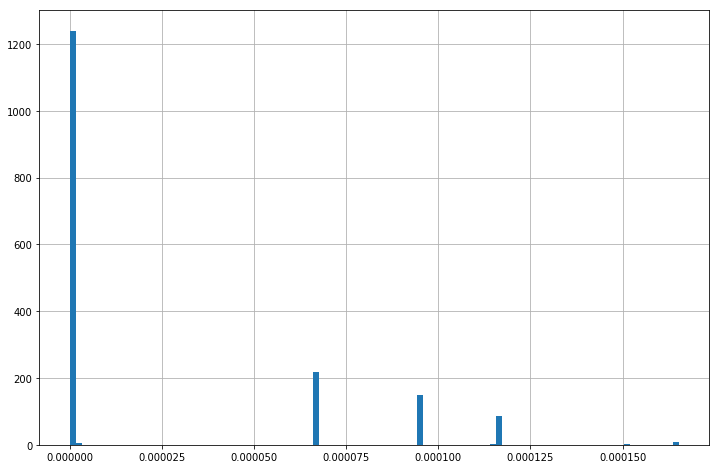

In [59]:
df_g.GRAD_B_MAG.hist(bins=100)

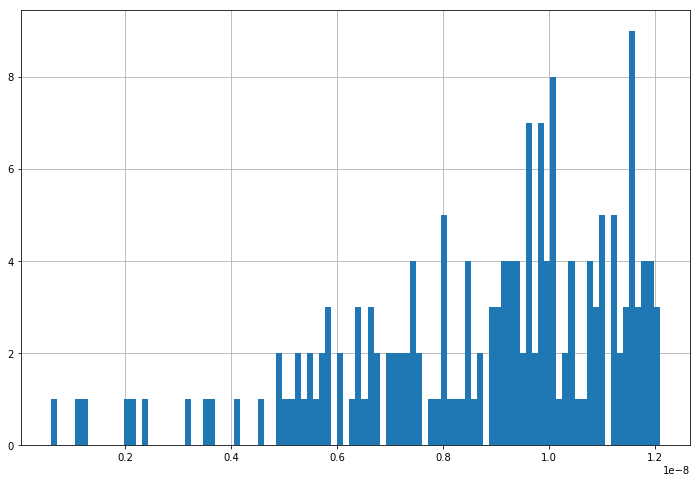

In [60]:
df_g[g_cut].GRAD_B_MAG.hist(bins=100)

In [61]:
df_c.GRAD_B_MAG.describe()

count    3.094000e+03
mean     3.027901e-05
std      4.789314e-05
min      0.000000e+00
25%      0.000000e+00
50%      1.985945e-08
75%      6.739370e-05
max      1.652294e-04
Name: GRAD_B_MAG, dtype: float64

In [62]:
df_c.GRAD_B_Y.describe()

count    3.094000e+03
mean     6.422914e-08
std      3.233526e-05
min     -1.347689e-04
25%     -2.464400e-09
50%      0.000000e+00
75%      3.440837e-09
max      1.347263e-04
Name: GRAD_B_Y, dtype: float64

In [63]:
df_c.GRAD_B_MAG

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.000000
28      0.000000
29      0.000067
          ...   
3064    0.000000
3065    0.000000
3066    0.000000
3067    0.000000
3068    0.000000
3069    0.000000
3070    0.000000
3071    0.000000
3072    0.000000
3073    0.000067
3074    0.000067
3075    0.000067
3076    0.000000
3077    0.000000
3078    0.000000
3079    0.000000
3080    0.000000
3081    0.000000
3082    0.000000
3083    0.000000
3084    0.000000
3085    0.000000
3086    0.000000
3087    0.000000
3088    0.000000
3089    0.000000
3090    0.000000
3091    0.0000

In [64]:
d0 = parser.parse(df['Time'].head(1)[0])

In [65]:
d = parser.parse(df['Time'].tail(1)[26039])

In [66]:
tdelta = d-d0

In [67]:
speed = tdelta.total_seconds() / len(df)
speed

29.237864823348694

In [68]:
20757*speed / 60 / 60 / 24

7.0241939830815845

In [69]:
30525*speed / 60 / 60 / 24

10.329697033943505

In [70]:
6069*speed/60/60/24

2.053756963112306

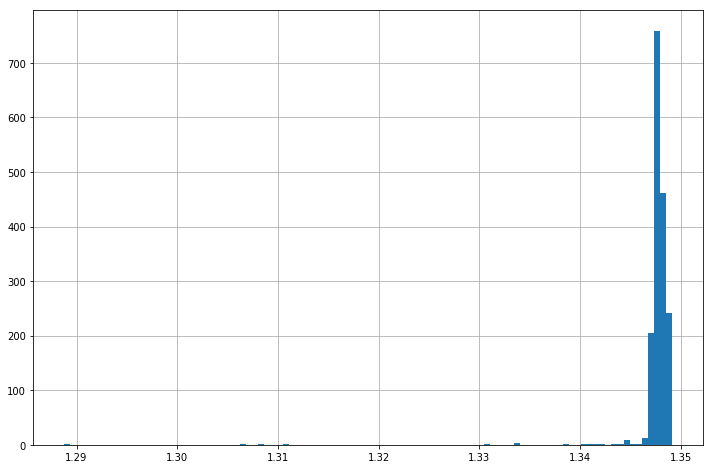

In [71]:
df_g['NMR [T]'].hist(bins=100)

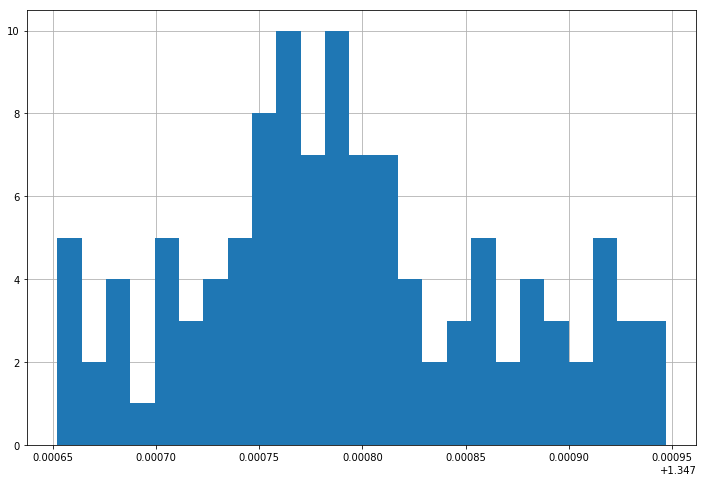

In [72]:
df_g[g_cut2]['NMR [T]'].hist(bins=25)

In [73]:
df_g['NMR [T]'].describe()

count    1708.000000
mean        1.347727
std         0.002414
min         1.288707
25%         1.347525
50%         1.347817
75%         1.348234
max         1.349145
Name: NMR [T], dtype: float64

In [74]:
df_g[g_cut2]['NMR [T]'].describe()

count    114.000000
mean       1.347793
std        0.000075
min        1.347652
25%        1.347746
50%        1.347786
75%        1.347843
max        1.347947
Name: NMR [T], dtype: float64

In [75]:
fig = histo(df_g['NMR [T]'],bins=100,inline=True)

In [76]:
fig.layout.title = "NMR [T]: No Cut"

In [77]:
iplot(fig)

In [78]:
fig = histo(df_g[g_cut2]['NMR [T]'],bins=25,inline=True)

In [79]:
fig.layout.title = "NMR [T]: Gradient + Position Cut"

In [80]:
iplot(fig)

What happens if instead we take 10% around the average value? Better results?

## Day 2: "Slices and Uniformity" -Thomas

In [19]:
x =  (df[' Zaber_Pattern_X'] >= 470000) & (df[' Zaber_Pattern_X'] <= 600000)
y =  (df[' Zaber_Pattern_Y'] >= 377000) & (df[' Zaber_Pattern_Y'] <= 537000)
z =  (df[' Zaber_Pattern_Z'] >= 1540000) & (df[' Zaber_Pattern_Z'] <= 1660000)
cube = x & y & z
df_c = df[cube]
df_c.reset_index(drop=True,inplace=True)

In [20]:
# 3d surface plots
df_c[' Zaber_Pattern_X'].unique()

array([470000., 480000., 490000., 500000., 510000., 520000., 530000.,
       540000., 550000., 560000., 570000., 580000., 590000., 600000.])

In [21]:
x1 = (df_c[' Zaber_Pattern_X'] == 540000.)

In [22]:
slicex = df_c[x1]

In [24]:
slicex.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z
count,221.000000,221.000000,221.000000,221.0,221.000000,2.210000e+02,221.0,221.000000,221.000000
mean,8.943569,39.873197,0.951039,540000.0,457000.000000,1.600000e+06,210937.5,178515.625000,625000.000000
std,0.000010,0.008404,0.615287,0.0,49101.009062,3.750152e+04,0.0,19180.081665,14649.029344
min,8.943541,39.852720,0.000000,540000.0,377000.000000,1.540000e+06,210937.5,147265.625000,601562.500000
25%,8.943566,39.866080,0.000000,540000.0,417000.000000,1.570000e+06,210937.5,162890.625000,613281.250000
50%,8.943571,39.876620,1.347203,540000.0,457000.000000,1.600000e+06,210937.5,178515.625000,625000.000000
75%,8.943576,39.879980,1.347531,540000.0,497000.000000,1.630000e+06,210937.5,194140.625000,636718.750000
max,8.943583,39.882040,1.347788,540000.0,537000.000000,1.660000e+06,210937.5,209765.625000,648437.500000


In [25]:
z = slicex[" Zaber_Pattern_Z"] == 1.6e6

In [27]:
slicex[z].describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z
count,17.000000,17.000000,17.000000,17.0,17.000000,17.0,17.0,17.000000,17.0
mean,8.943569,39.873211,1.347386,540000.0,457000.000000,1600000.0,210937.5,178515.625000,625000.0
std,0.000010,0.008633,0.000398,0.0,50497.524692,0.0,0.0,19725.595583,0.0
min,8.943544,39.853560,1.346516,540000.0,377000.000000,1600000.0,210937.5,147265.625000,625000.0
25%,8.943566,39.866380,1.347131,540000.0,417000.000000,1600000.0,210937.5,162890.625000,625000.0
50%,8.943572,39.876620,1.347507,540000.0,457000.000000,1600000.0,210937.5,178515.625000,625000.0
75%,8.943576,39.879970,1.347705,540000.0,497000.000000,1600000.0,210937.5,194140.625000,625000.0
max,8.943581,39.881970,1.347788,540000.0,537000.000000,1600000.0,210937.5,209765.625000,625000.0


In [30]:
fig = scatter2d(slicex[z][" Zaber_Meas_Encoder_Y"], slicex[z]["NMR [T]"], inline=True)

In [86]:
histo(slicex['NMR [T]'][slicex['NMR [T]']!=0],bins=25,inline=True);

In [87]:
#x = slicex[' Zaber_Pattern_X'].unique()
x = slicex[' Zaber_Pattern_Y'].unique()
y = slicex[' Zaber_Pattern_Z'].unique()
z = np.array(slicex['NMR [T]'])
z = np.array([i if i>=slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) else slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) for i in z])
#XX = XX.flatten()
#YY = YY.flatten()
#ZZ = XX.flatten()
xx,yy = np.meshgrid(x,y,indexing='ij')
zz = np.reshape(z,(len(x),len(y)))

In [88]:
data = [go.Surface(x=xx,y=yy,z=zz, opacity=0.8, colorscale="Viridis")]#,cmin=1.346,cmax=1.348)]

layout = go.Layout(
    title='Calibrated B_mag vs. Angle',
    scene = dict(
    xaxis= dict(
        title='Zaber_Pattern_Y'
    ),
    yaxis=dict(
        title='Zaber_Pattern_Z'
    ),
    zaxis=dict(
        title='NMR (T)'
    )
    )
)

fig = go.Figure(data=data, layout=layout)

In [89]:
plot(fig)

'file:///home/ckampa/Coding/hallprobecalib/scripts/temp-plot.html'

In [90]:
slicesx = []
for x in df_c[' Zaber_Pattern_X'].unique():
    #_ = df_c[df_c[' Zaber_Pattern_X'] == x]
    slicesx.append(df_c[df_c[' Zaber_Pattern_X'] == x])
    #slicesx.append(_)

In [91]:
x_slice = slicex[' Zaber_Pattern_X'].head(1).values[0]
x_slice

540000.0

In [115]:
for slicex in slicesx:
    x_slice = slicex[' Zaber_Pattern_X'].head(1).values[0]
    x = slicex[' Zaber_Pattern_Y'].unique()
    y = slicex[' Zaber_Pattern_Z'].unique()
    z = np.array(slicex['NMR [T]'])
    z = np.array([i if i>=slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) else slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) for i in z])
    xx,yy = np.meshgrid(x,y,indexing='ij')
    zz = np.reshape(z,(len(x),len(y)))
    
    data = [go.Surface(x=xx,y=yy,z=zz, opacity=0.8, colorscale="Viridis")]#,cmin=1.346,cmax=1.348)]

    layout = go.Layout(
        title=f'Zaber_Pattern_X = {x_slice} slice',
        scene = dict(
        xaxis= dict(
            title='Zaber_Pattern_Y'
        ),
        yaxis=dict(
            title='Zaber_Pattern_Z'
        ),
        zaxis=dict(
            title='NMR (T)'
        )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    fname = f"/home/ckampa/Dropbox/research/deliverables/plots/slices/xslice_pattern_{x_slice}"#+'.pdf'
    plot(fig,filename=fname+'.html')
    pio.write_image(fig, fname+'.pdf')

In [47]:
scatter3d(slicex[' Zaber_Pattern_X'],slicex[' Zaber_Pattern_Y'],slicex[' Zaber_Pattern_Z'],scale_list=[slicex['NMR [T]']],inline=True);

In [30]:
data = [go.Surface(z=slicex['NMR [T]'].values.tolist(), colorscale='Viridis')]
fig = dict(data=data)

In [31]:
iplot(fig)

In [84]:
df_g = df_c[df_c['NMR [T]']!=0]
n = df_g["NMR [T]"] >= df_g["NMR [T]"].quantile(0.05)

In [102]:
filename = "/home/ckampa/Dropbox/research/deliverables/plots/nmr_3d_full.html"
fname = "/home/ckampa/Dropbox/research/deliverables/plots/nmr_3d_full.pdf"
fig = scatter3d(df_g[n][' Zaber_Pattern_X'],df_g[n][' Zaber_Pattern_Y'],df_g[n][' Zaber_Pattern_Z'],scale_list=[df_g[n]['NMR [T]']],opacity_list=[.75],size_list=[3],colors_list=['Viridis'],inline=True);
plot(fig,filename=filename)
#pio.write_image(fig,fname)

'file:///home/ckampa/Dropbox/research/deliverables/plots/nmr_3d_full.html'

In [83]:
scatter3d(df_c[' Zaber_Pattern_X'],df_c[' Zaber_Pattern_Y'],df_c[' Zaber_Pattern_Z'],scale_list=[df_c['NMR [T]']],inline=True)

Figure({
    'data': [{'marker': {'cauto': False,
                         'cmax': 1.349145056,
                         'cmin': 0.0,
                         'color': array([0., 0., 0., ..., 0., 0., 0.]),
                         'colorbar': {'thickness': 20, 'title': 'NMR [T] (T)', 'x': -0.1, 'y': 0.5},
                         'colorscale': 'Viridis',
                         'opacity': 0.8,
                         'reversescale': False,
                         'showscale': True,
                         'size': 2},
              'mode': 'markers',
              'name': ('<br>x:  Zaber_Pattern_X (mm)<b' ... 'br>z:  Zaber_Pattern_Z (T)<br>'),
              'type': 'scatter3d',
              'uid': '18aab195-af14-4e23-9208-9f9447655c56',
              'x': array([470000., 470000., 470000., ..., 600000., 600000., 600000.]),
              'y': array([377000., 377000., 377000., ..., 537000., 537000., 537000.]),
              'z': array([1540000., 1550000., 1560000., ..., 1640000., 1650